<a href="https://colab.research.google.com/github/Jihyun13579/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch5_1~5_(4%EC%A0%9C%EC%99%B8)_pg_290~319(303~310_%EC%A0%9C%EC%99%B8)_%ED%95%84%EC%82%ACipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 파이썬 머신러닝 완벽가이드 ch5. 1 ~ 5 (4제외) pg. 290 ~ 319(303 ~ 310 제외) 필사

# CH05. 회귀

## CH05.01. 회귀 소개

**회귀: 데이터 값이 평균과 같은 일정한 값으로 돌아가려는 경향을 이용한 통계학 기법**
- 유전적 특성을 연구하던 영국 통계학자 갈톤이 수행한 연구에서 유래함
 - 즉, '사람의 키는 **평균 키로 회귀하려는 경향**을 가진다는 자연의 법칙 존재 결론

- 통계학적으로 회귀: **여러 개의 독립 변수(피처)와 한 개의 종속 변수(결정 값) 간의 상관관계 모델링하는 기법** 통칭
 - 머신러닝 회귀 예측의 핵심: **회귀계수**=주어진 피처와 결정 값 데이터 기반에서 학습을 통해 **최적의 회귀 계수** 찾아내는 것

**지도학습의 종류**
1. Classification > 예측값 : 이산형 클래스 값 = Category 값
2. Regression > 예측값 : 연속형 숫자값

**회귀의 종류**

|독립변수 개수|회귀계수의 결합|
|------|-----|
|1개 : 단일 회귀|선형 : 선형 회귀|
|여러 개 : 다중 회귀|비선형 : 비선형 회귀|

 - 선형 회귀 : 실제 값과 예측값의 차이(오류의 제곱 값)를 최소화하는 직선형 회귀선을 최적화하는 방식
 - 선형 회귀 모델의 종류 : 규제(regularization, 일반적인 선형 회귀의 과적합 문제 해결 위해 회귀 계수에 페널티 값 적용하는 것) 방법의 차이
  - 일반 선형 회귀 : 예측값과 실제 값의 **RSS(Residual Sum of Square)** 최소화할 수 있도록 회귀 계수 최적화하며, 규제 적용 X 모델
  - 릿지 : 선혀 회귀에 L2 규제(상대적으로 큰 회귀 계수 값의 예측 영향도 감소 위해 회귀 계수값 더 작게 만드는 규제) 추가한 회귀 모델
  - 라쏘 : 선형 회귀에 L1 규제(=예측 영향력이 작은 피처의 회귀 계수 0으로 만들어 회귀 예측시 피처 사용 X) 적용한 방식
  - 엘라스틱넷 : L2, L1 규제 함께 결합한 모델 / 주로 피처가 많은 데이터 세트에 적용됨
  - 로지스틱 회귀 : 분류에 사용되는 선형 모델

 

## CH05.02. 단순 선형 회귀를 통한 회귀 이해
: 독립 변수 1개, 종속 변수 1개인 선형 회귀

- 예시 : 주택 가격이 주택의 크기로만 결정되는 경우

= 주택 가격은 주택 크기에 대해 선형(직선 형태)의 관계로 표현 가능
- 회귀 모델(1차 함수): 예측값 ^Y = W0 + W1*X (W0,W1는 회귀계수)
- 실제 주택 가격: 예측값 ^Y = W0 + W1*X + 잔차(=1차 함수 값에서 실제 값만큼의 오류 값)

**최적의 회귀 모델** = 전체 데이터의 잔차(오류 값) 합(=RSS)가 최소가되는 모델
- = 오류 값 합이 최소가 될 수 있는 최적의 회귀 계수 찾기
- 오류 합: 음수,양수 모두 가능 > 절댓값 취해서 더하거나(MAE, Mean Absolute Error) **오류 값 제곱 구해서 더하는 방식(RSS, Residual Sum of Square)**
- 주로 RSS 사용(미분 등 편리)

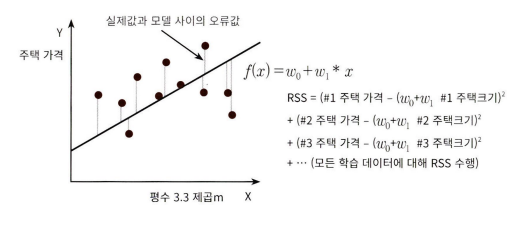

**RSS** = 비용(Cost)
- 변수가 회귀 계수 W0, W1인 식으로 표현 가능 > 회구계수=W 변수가 중심변수(독립변수 X, 종속 변수 Y가 중심 변수 X)
- RSS 최소로 하는 W0, W1 찾는 것이 머신러닝 기반 회귀의 핵심 사항

- 비용 함수 = 손실 함수(loss function)
 : w변수=회귀계수로 구성됨

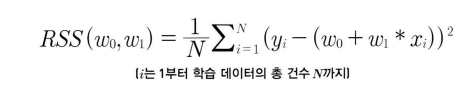

## CH05.03. 비용 최소화하기 - 경사 하강법(Gradient Descent) 소개

**경사하강법**
: 계산 어려 고차원 방정식에서 비용 함수 = RSS가 최소가 되는 W 파라미터 구하는 방법
- '점진적으로' 반복된 계산을 통해 W 파라미터 값을 업데이터하면서 오류 값이 최소가 되는 W 파라미터를 구하는 방식
- **반복적으로 비용 함수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W 파라미터를 지속해서 보정해감**
- "어떻게 하면 오류가 작아지는 방향으로 W 값을 보정할 수 있을까?"
 - ex) 산을 내려가는 방식 : 현재 위치보다 무조건 낮은 곳으로 계속 이동하다 보면 지상 도착 가능 (but, 지역 함수의 최솟값에 갇힐 가능성도 O)
 - ex) 비용 함수 : 포물선 형태 2차함수일 때, 경사하강법 : 최초 w에서부터 미분 적용 > 미분 값 계속 감소하는 방향으로 순차적으로 w 업데이트 > 미분된 1차함수 기울기 더이상 감소하지 않는 지점을 비용 함수가 최소인 지점으로 간주, 그때의 w 반환함
- 고차원 방정식 푸는 것보다 더 직관적이고 빠르게 비용 함수 최소가 되는 W 파라미터 값 구할 수 있음

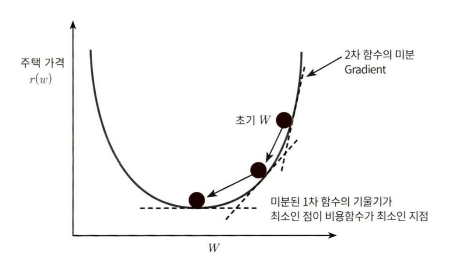

**RSS 식=RSS(W0,W1)에서의 경사하강법**

R(W) = 1/N * (yi - (W0 + W1 * Xi))^2

- 2개의 W 파라미터 W0, W1 가지고 있음 > W0, W1 각 변수에 편미분 적용해야 함
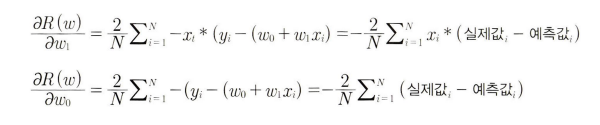

- 위 식을 반복적으로 보정하면서 W1, W0 값 업데이트하면 비용함수 R(W)가 최소가 되는 W1,W0 구할 수 있음
- **학습률"" : 구한 편미분 값이 너무 클 수 있기 때문에 곱하는 보정 계수 n

**경사 하강법의 일반적인 프로세스**
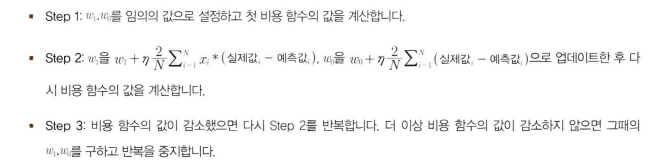

- 경사 하강법 파이썬 코드로 구현하기
 - y = 4x + 6 을 근사하기위한 100개의 데이터 세트에서 경사 하강법을 이용해 회귀 계수 W1, W0 도출하기

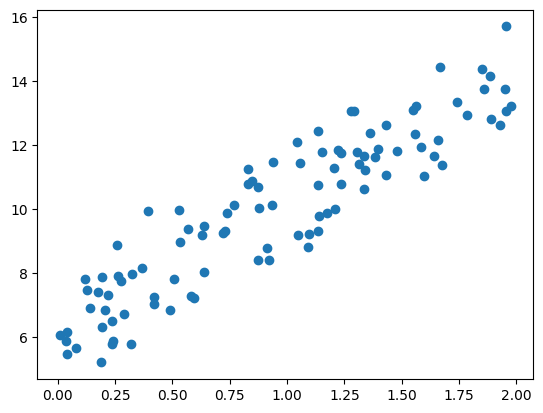

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
# y = 4X + 6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듦.
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.randn(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

# 결과 : 데이터 y = 4x + 6 중심으로 퍼져 있음

In [9]:
# 비용 함수 정의하기 : 실제 y 값과 예측된 y 값 받아 RSS 식 계산해 반환함

def get_cost(y,y_pred):
  N=len(y)
  cost=np.sum(np.square(y-y_pred))/N 
  return cost

In [10]:
# 경사 하강법 구현한 함수 생성하기

# w1 과 w0 를 업데이트 할 w1_update, w0_update를 반환. 
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    # 먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
         
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성 
    w0_factors = np.ones((N,1))

    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
    return w1_update, w0_update

In [13]:
# get_weight_updates()을 경사 하강 방식으로 반복 수행하여 W1,W0 업데이트하는 함수 생성하기

# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함. 
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [15]:
# gradient_descent_steps() 호출해 w1, w0 구하기 

def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

# 예측값과 실제값의 RSS 차이 계산하는 함수 생성 > 경사 하강법의 예측 오류 계산

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

# 결과: w1:4.022 w0:6.162 도출, 예측 오류 비용 약 0.9935
# 실제 선형식 y=4x+6 과 유사

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


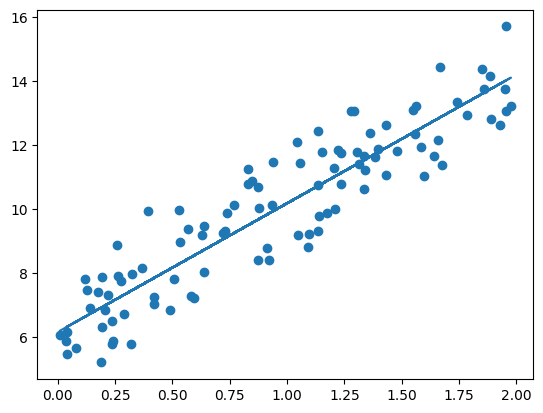

In [16]:
# 앞에서 구한 y_pred에 기반해 회귀선 그리기

plt.scatter(X,y)
plt.plot(X, y_pred)

# 경사하강법 이용해 회귀선 잘 만들어졌음 확인 가능

경사 하강법의 단점
: 모든 학습 데이터에 반복적으로 비용 함수 최소화 위한 값 업데이트 > 수행 시간 매우 오래 걸림

> 실전에서는, **확률적 경사 하강법(Stochastic Gradient Descent)** 사용
: 일부 데이터만 이용해 w가 업데이트되는 값 계산 > 경사 하강법에 비해 빠른 속도 보장함
 - 대용량 데이터의 경우 대부분 확률적 경사 하강법 / 미니 배치 확률적 경사 하강법 이용해 최적 비용함수 도출함

- (미니 배치) 확률적 경사 하강법 stochastic_gradient_descent_steps() 함수로 구현하기

In [18]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0

    for ind in range(iters):
        np.random.seed(ind)
        #전체 X,y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        # 랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

In [19]:
# stochastic_gradient_descent_steps() 이용해 w1, w0 및 예측 오류 비용 계산하기

w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print("w1:", round(w1[0,0], 3), "w0:", round(w0[0,0], 3))
y_pred = w1[0,0] * X + w0
print('Stochastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

# 결과 : 경사 하강법보다 약간 차이가 날 뿐 큰 차이 X 
# 큰 데이터의 경우 일반적으로 확률 경사 하강법 이용

w1: 4.028 w0: 6.156
Stochastic Gradient Descent Total Cost:0.9937


**피처가 여러 개인 경우, 어떻게 회귀 계수를 도출하는가?**

- 피처가 1개인 경우 확장해 유사하게 도출 가능
- 피처가 M개 > 회귀 계수 M+1개
- 회귀 예측값 : Y^ = Xmat * W^T
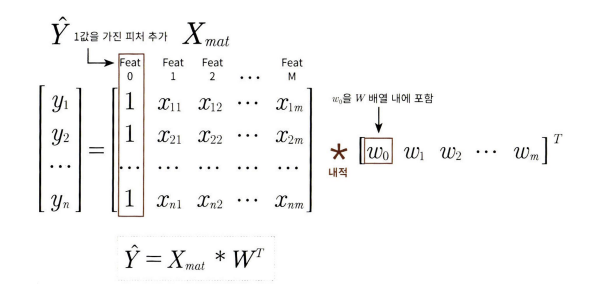

## CH05.05. 다항 회귀와 과(대)적합/과소적합 이해

### 다항 회귀 이해

다항 회귀 : 회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것
 - y = w0 + w1 * x1 + w2 * x2 + w3 * x1 * w2 + w4 * x1^2 + w5 * x2^2
 - 선형 회귀의 일종 : 회귀 계수가 선형/비선형인지가 기준! (기준: 독립변수의 선형/비선형 여부와는 무관)
 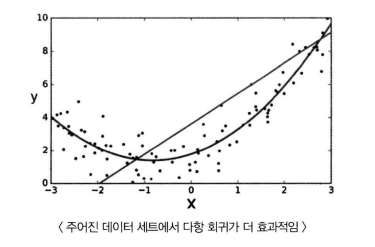

사이킷런 : 다항 회귀 위한 클래스 명시적으로 제공 X

Instead, 비선형 함수를 선형 모델에 적용시키는 방법 사용해 구현 가능

- PolynomialFeatures 클래스: degree 파라미터 통해 입력받은 단항식 피처 degree에 해당하는 다항식 피처로 변환함(<fit(), transform() 메서드 이용)
- PolynomialFeatures 이용해 단항값 [x1,x2] 2차 단항값 [1, x1, x2, x1^2, x1x2, x2^2]로 변환하기

In [20]:
from sklearn.preprocessing import PolynomialFeatures 
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2*2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n', X)

# degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n', poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 3차 다항 계수 이용해 3차 다항 회귀 함수식을 PolynomialFeatures와 LinearRegression 클래스 이용해 유도하기

 1. 3차 다항 회귀 함수 임의로 설정하고 이의 회귀계수 예측하기

In [21]:
# 3차 다항 계수 피처 값 입력되면 결정 값 반환하는 함수 생성하기

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

X = np.arange(0,4).reshape(2,2)
print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
삼차 다항식 결정값: 
 [  5 125]


 2. 일차 단항식 계수를 삼차 다항식 계수로 변환하고
 - 이를 선형 회귀에 적용하면 다항 회귀로 구현됨



In [22]:
# 3 차 다항식 변환 
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

# Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(poly_ftr,y)
print('Polynomial 회귀 계수\n' , np.round(model.coef_, 2))
print('Polynomial 회귀 Shape :', model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape : (10,)


- 사이킷런의 Pipeline 객체 이용해 한 번에 다항 회귀 구현하기

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 Streamline하게 Polynomial Feature변환과 Linear Regression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 다항 회귀를 이용한 과소적합 및 과적합 이해

다항 회귀 : 다항식의 차수가 높아질수록 복잡한 다항 관계 모델링 가능

But, 다항 회귀의 차수(degree) 높일수록 학습 데이터에만 너무 맞춤 학습 이루어짐 > 테스트 데이터 환경에서 예측 정확도 떨어짐 = **과적합 분제** 크게 발생


- 사이킷런 홈페이지 - 다항 회귀를 이용해 과소적합과 과적합의 문제를 잘 보여주는 예제 발췌
 - 원래 데이터 세트 : 피처 X와 target y : 잡음(Noise) 포함된 다항식 코사인(Cosine) 그래프 관계 가지도록 만들어줌 > 다항 회귀 차수 변화시키면서 그에 따른 회귀 예측 곡선과 예측 정확도 비교하기

In [25]:
# 1. 학습 데이터 생성하기

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 임의의 값으로 구성된 X값에 대해 코사인 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.  
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun() 에서 약간의 노이즈 변동 값을 더한 값입니다. 
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03899000e+05 -1.87416100e+06  2.03716220e+07
 -1.44873283e+08  7.09315363e+08 -2.47065792e+09  6.24561050e+09
 -1.15676510e+10  1.56894936e+10 -1.54006024e+10  1.06457264e+10
 -4.91377530e+09  1.35919645e+09 -1.70380786e+08] 입니다.
Degree 15 MSE 는 181238256.56 입니다.


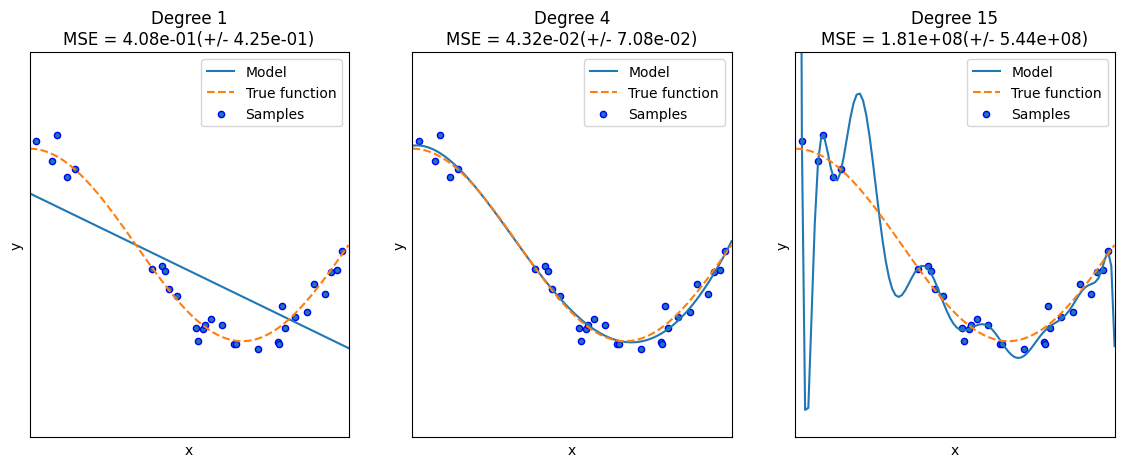

In [26]:
# 2. 예측 결과 비교할 다항식 차수 1,4,15로 변경하면서 예측 결과 비교하기

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다. 
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다. 
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다. > MSE 값 구해 차수별 예측 성능 비교
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다. 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.  
    X_test = np.linspace(0, 1, 100)
    # 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()


- 실선으로 표현된 예측 곡선 : 다항 회귀 예측 곡선
- 점선 표현된 곡선 : 실제 데이터 세트 X, Y의 코사인 곡선
- 학습 데이터 : 0부터 1까지의 30개 임의의 X 값과 그에 따른 코사인 Y값에 잡음을 변동값으로 추가한 것으로 구성됨
- MSE 평가: 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 것

 > 결과 
 - 맨 왼쪽 Degree1 예측 곡선 : 과소 적합 모델, 예측 곡선이 학습 데이터의 패턴 제대로 파악 X 모델
 - 가운데의 Degree2 예측 곡선 : 실제 데이터와 유사함, 가장 뛰어난 예측 성는
 - 맨 오른쪽 Degree3 예측 곡선 : 과적합 모델, 변동 잡음 값까지 지나치게 반영 > 예측 곡선이 학습 데이터만 정확히 예측 = 매우 큰 MSE 값 나옴, 테스트 값 잘 예측 X

 **좋은 예측 모델 : 학습 데이터의 패턴 잘 반영하면서도 복잡하지 않은 균형 잡힌(Balanced) 모델을 의미한다.**

### 편향-분산 트레이트오프(Bias-Variance Trade off)

**편향-분산 트레이트오프**
: 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향 존재

- 머신 러닝이 극복해야 할 가장 중요한 이슈 중 하나

- ex. '양궁 과녁' 그래프

|편향/분산| 저분산 | 고분산|
|-------|-------|-------|
|저편향|예측 결과가 실제 결과에 매우 잘 근접 <br/>+ 예측 변동이 크지 않고 특정 부분에 집중되어 있음|예측 결과가 실제 결과에 비교적 근접 <br/>+ 예측 결과가 실제 결과 중심으로 넓은 부분에 분포|
|고편향|정확한 결과에서 벗어남 <br/>+ 예측이 특정 부분에 집중됨|정확한 예측 결과 벗어남 <br/>+ 넓은 부분에 분포|

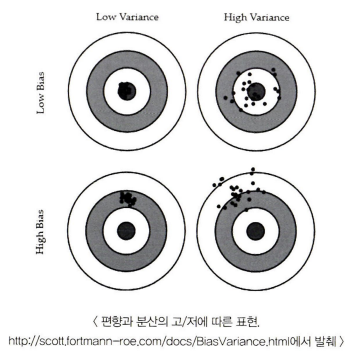

- 편향이 높으면(/낮은 분산) 분산이 낮아짐(과소적합 가능성 증가)
- 분산이 높으면(/낮은 편향) 편향이 낮아짐(과적합 가능성 증가)

-다음 그림 : 편향과 분산의 관계에 따른 전체 오류 값(Total Error) 변화 보여줌
 - 골디락스 지점 이전 편향 너무 높으면? 전체 오류 값 높음 > 낮추면 분산 높아지며 전체 오류 값 감소함
 - '골디락스' 지점 : 편향을 낮추고 분산을 높이면서 전체 오류가 가장 낮아지는 지점 
 - 골디락스 지점 통과하며 분산 높이면? 전체 오류 값 증가, 예측 성능 다시 저하됨
 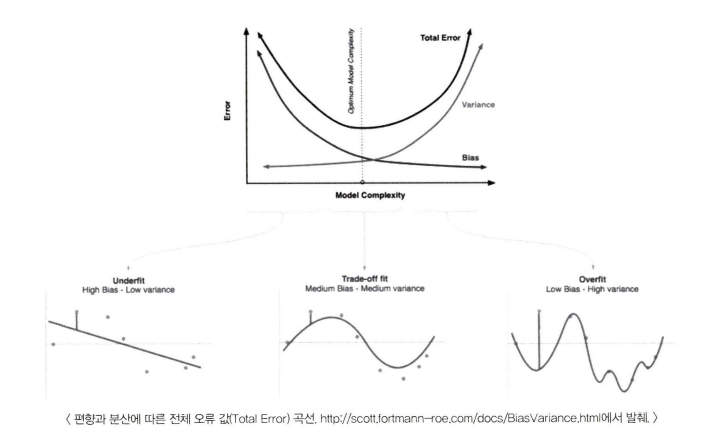

**편향과 분산이 서로 트레이트오프 이루면서 오류 Cost 값이 최대로 낮아지는 모델 구축하는 것이 가장 효율적인 머신러닝 예측 모델 생성하는 것!**